**Name** - Ayush Srivastav

**Topic** - Brain tumor detection using machine learning

**Data** - https://www.kaggle.com/jakeshbohaju/brain-tumor

## Importing Libraries

In [2]:
from natsort import natsorted
import numpy as np 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import os

sns.set_style('whitegrid')
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
import pandas as pd
data=pd.read_csv('./Brain Tumor.csv')
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


## Scaling the data

In [4]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


data[scalable]=StandardScaler().fit_transform(data[scalable])
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,Image2,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,Image3,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168
3,Image4,1,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,-1.117857e-168
4,Image5,0,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,-1.117857e-168


## Finding data coreelation and distribution

In [7]:
y=data['Class']
y.value_counts()

0    2079
1    1683
Name: Class, dtype: int64

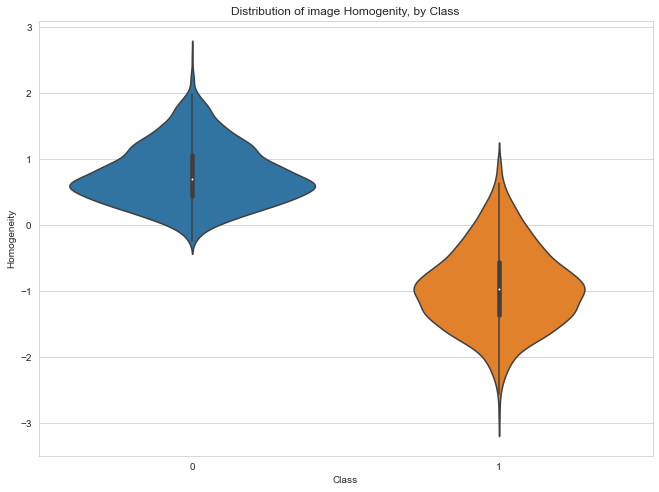

In [12]:
plt.figure(figsize=(11,8))
sns.violinplot(x=y, y= data['Homogeneity'])
plt.title("Distribution of image Homogenity, by Class")
plt.show()

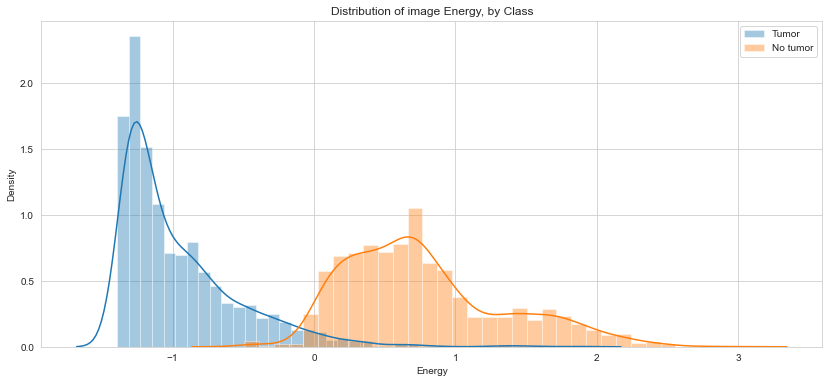

In [17]:
plt.figure(figsize=(14,6))
class1=data['Class']== 1
class0=data['Class']== 0
_data=data.copy()
_data=data.drop('Image',axis=1,inplace=False)
sns.distplot(a= _data[class1]['Energy'], label="Tumor")
sns.distplot(a = _data[class0]['Energy'], label="No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()
plt.show()